### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Plotting different polynomials

#### Linear equation

Text(0.5, 0, 'Independent variable')

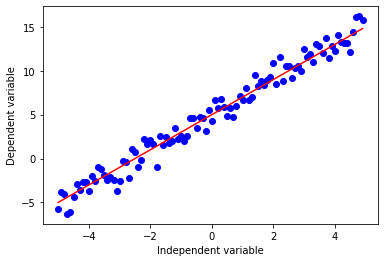

In [2]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2 * x + 5
y_noise = y + np.random.normal(size=x.size)

plt.plot(x, y_noise, 'bo')
plt.plot(x, y, 'r-')
plt.ylabel('Dependent variable')
plt.xlabel('Independent variable')

#### Quadratic equation

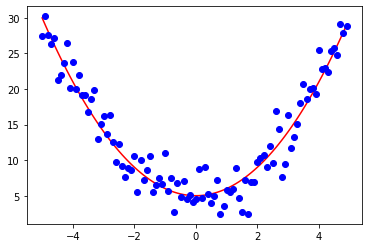

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = x**2 + 5

y_noise = y + 2 * np.random.normal(size=x.size)

plt.plot(x, y, 'r-')
plt.plot(x, y_noise, 'bo')

#### Cubic equation

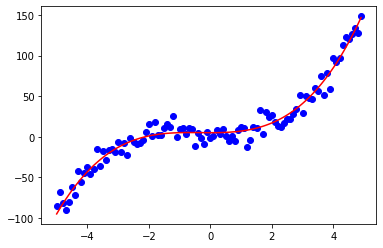

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = x**3 + x**2 + 5

y_noise = y + 10 * np.random.normal(size = x.size)

plt.plot(x, y_noise, 'bo')
plt.plot(x, y, 'r-')

#### Exponential

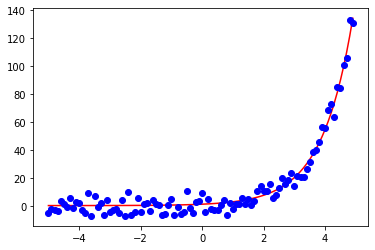

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)

y_noise = y + 5 * np.random.normal(size = x.size)

plt.plot(x, y, 'r-')
plt.plot(x, y_noise, 'bo')


#### Logarithmic

C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


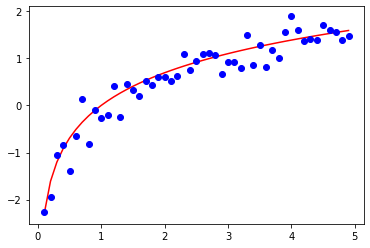

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.log(x)
y_noise = y + 0.3 * np.random.normal(size=x.size)
plt.plot(x, y, 'r-')
plt.plot(x, y_noise, 'bo')

#### Sigmoidal/Logistic

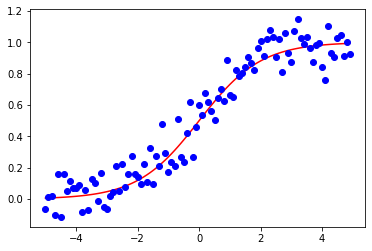

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1 / (1 + np.exp(-x))
y_noise = y + 0.1 * np.random.normal(size = x.size)

plt.plot(x, y, 'r-')
plt.plot(x, y_noise, 'bo')

## Non linear Regression Example

In [8]:
df = pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [9]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


Text(0, 0.5, 'GDP')

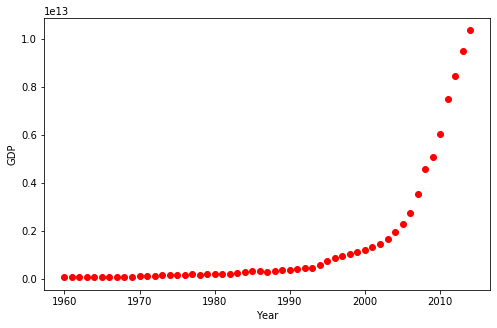

In [10]:
plt.figure(figsize=(8,5))
plt.plot(df['Year'], df['Value'], 'ro')
plt.xlabel('Year')
plt.ylabel('GDP')

#### Shape of the data suggests that a logistic function would fit it

### Building the model

In [16]:
def sigmoid(x, beta1, beta2):
    return 1/(1+np.exp(-beta1*(x-beta2)))

In [17]:
sigmoid(1,2,3)

0.01798620996209156

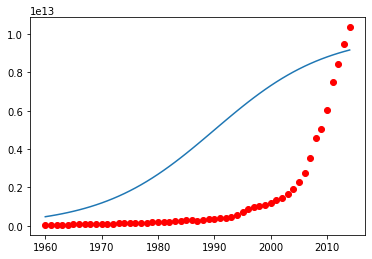

In [28]:
beta1 = 0.10
beta2 = 1990.0
x_data = df["Year"]
y_data = df["Value"]
y_pred = sigmoid(x_data, beta1, beta2)

plt.plot(x_data, y_pred*10000000000000)
plt.plot(x_data, y_data, 'ro')

In [29]:
#Normalizing data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [32]:
#Finding best parameters for our fit line
from scipy.optimize import curve_fit #Uses non-linear least squares to fit a function, f, to data.
popt, pcov = curve_fit(sigmoid, xdata, ydata) #popt = optimum values of variables, pcov = covariance of popt

print(" beta1= %f, beta2= %f" % (popt[0], popt[1]))

 beta1= 690.451711, beta2= 0.997207


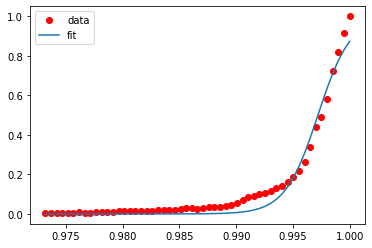

In [37]:
# Plotting data and fit line
y = sigmoid(xdata, popt[0], popt[1]) # or use sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro',label='data')
plt.plot(xdata, y, label='fit')
plt.legend()

### Evaluating the model

In [41]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y-ydata)))
print("Mean square error: %.2f" % np.mean((y-ydata)**2))
print("R2-score: %.2f" % r2_score(y, ydata))

Mean absolute error: 0.03
Mean square error: 0.00
R2-score: 0.97
